In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [40]:
#  Import and read the charity_data.csv.
df = pd.read_csv("Resources/pokemon_combats.csv")
df.head()

,match_id,first,first_name,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,...,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_generation,second_legendary,winner
0,1,266,Larvitar,Rock,Ground,50,64,50,45,50,...,Dark,70,70,40,60,40,60,3,False,298
1,2,702,Virizion,Grass,Fighting,91,90,72,90,129,...,Fighting,91,129,90,72,90,108,5,True,701
2,3,191,Togetic,Fairy,Flying,55,40,85,80,105,...,NaN,75,75,75,125,95,40,5,False,668
3,4,237,Slugma,Fire,NaN,40,40,40,70,40,...,NaN,77,120,90,60,90,48,5,False,683
4,5,151,Omastar,Rock,Water,70,60,125,115,70,...,Rock,20,10,230,10,230,5,2,False,151


In [41]:
for index, row in df.iterrows():
    if row["winner"] == row["first"]:
        df.loc[index, "winner"] = 0
    elif row["winner"] == row["second"]:
        df.loc[index, "winner"] = 1

df.head()

,match_id,first,first_name,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,...,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_generation,second_legendary,winner
0,1,266,Larvitar,Rock,Ground,50,64,50,45,50,...,Dark,70,70,40,60,40,60,3,False,1
1,2,702,Virizion,Grass,Fighting,91,90,72,90,129,...,Fighting,91,129,90,72,90,108,5,True,1
2,3,191,Togetic,Fairy,Flying,55,40,85,80,105,...,NaN,75,75,75,125,95,40,5,False,1
3,4,237,Slugma,Fire,NaN,40,40,40,70,40,...,NaN,77,120,90,60,90,48,5,False,1
4,5,151,Omastar,Rock,Water,70,60,125,115,70,...,Rock,20,10,230,10,230,5,2,False,0


In [42]:
df.drop(["match_id", "first", "first_name", "first_generation", "first_legendary", "second", "second_name", "second_generation", "second_legendary"], axis=1, inplace=True)
df.head()

,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,second_type_1,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,Rock,Ground,50,64,50,45,50,41,Grass,Dark,70,70,40,60,40,60,1
1,Grass,Fighting,91,90,72,90,129,108,Rock,Fighting,91,129,90,72,90,108,1
2,Fairy,Flying,55,40,85,80,105,40,Psychic,NaN,75,75,75,125,95,40,1
3,Fire,NaN,40,40,40,70,40,20,Dragon,NaN,77,120,90,60,90,48,1
4,Rock,Water,70,60,125,115,70,55,Bug,Rock,20,10,230,10,230,5,0


In [43]:
df.drop(["first_type_2", "second_type_2"], axis=1, inplace=True)
df.head()

,first_type_1,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,second_type_1,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,Rock,50,64,50,45,50,41,Grass,70,70,40,60,40,60,1
1,Grass,91,90,72,90,129,108,Rock,91,129,90,72,90,108,1
2,Fairy,55,40,85,80,105,40,Psychic,75,75,75,125,95,40,1
3,Fire,40,40,40,70,40,20,Dragon,77,120,90,60,90,48,1
4,Rock,70,60,125,115,70,55,Bug,20,10,230,10,230,5,0


In [44]:
first_type_dummies = pd.get_dummies(df["first_type_1"], dtype=int)
second_type_dummies = pd.get_dummies(df["second_type_1"], dtype=int)

df_supplement = df[["second_hp", "second_attack", "second_defense", "second_sp_atk", "second_sp_def", "second_speed", "winner"]]
df.drop(["first_type_1", "second_type_1", "second_hp", "second_attack", "second_defense", "second_sp_atk", "second_sp_def", "second_speed", "winner"], axis=1, inplace=True)

df = pd.concat([first_type_dummies, df], axis=1)
df.rename(columns={"Bug": "first_bug", "Dark": "first_dark", "Dragon": "first_dragon", "Electric": "first_electric", "Fairy": "first_fairy",
                        "Fighting": "first_fighting", "Fire": "first_fire", "Flying": "first_flying", "Ghost": "first_ghost", "Grass": "first_grass",
                        "Ground": "first_ground", "Ice": "first_ice", "Normal": "first_normal", "Poison": "first_poison", "Psychic": "first_psychic",
                        "Rock": "first_rock", "Steel": "first_steel", "Water": "first_water"}, inplace=True)

df = pd.concat([df, second_type_dummies, df_supplement], axis=1)
df.rename(columns={"Bug": "second_bug", "Dark": "second_dark", "Dragon": "second_dragon", "Electric": "second_electric", "Fairy": "second_fairy",
                        "Fighting": "second_fighting", "Fire": "second_fire", "Flying": "second_flying", "Ghost": "second_ghost", "Grass": "second_grass",
                        "Ground": "second_ground", "Ice": "second_ice", "Normal": "second_normal", "Poison": "second_poison", "Psychic": "second_psychic",
                        "Rock": "second_rock", "Steel": "second_steel", "Water": "second_water"}, inplace=True)
df.head()

,first_bug,first_dark,first_dragon,first_electric,first_fairy,first_fighting,first_fire,first_flying,first_ghost,first_grass,...,second_rock,second_steel,second_water,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,70,40,60,40,60,1
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,91,129,90,72,90,108,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,75,75,75,125,95,40,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,77,120,90,60,90,48,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,10,230,10,230,5,0


In [45]:
df.to_csv("Resources/pokemon_combats_etl.csv")

In [46]:
# Split our preprocessed data into our features and target arrays
X = df.drop("winner", axis=1)
y = df["winner"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest

In [48]:
# Create the random forest classifier instance
# Fit the model
model = RandomForestClassifier(n_estimators=500, random_state=78).fit(X_train, y_train)

In [49]:
# Making predictions using the testing data
predictions = model.predict(X_test)

In [50]:
# Calculating the accuracy score
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

Accuracy: 0.94304
Precision: 0.9505761067313523
Recall: 0.9420072115384616


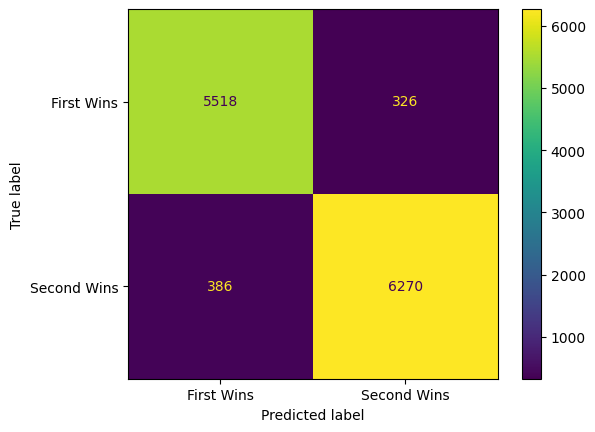

In [51]:
# Displaying results
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions), display_labels=["First Wins", "Second Wins"])
disp.plot()

In [55]:
test_df = pd.read_csv("Resources/test.csv")
test_df

,first_bug,first_dark,first_dragon,first_electric,first_fairy,first_fighting,first_fire,first_flying,first_ghost,first_grass,...,second_psychic,second_rock,second_steel,second_water,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,94,50,94,50,66,0


In [56]:
# Split our preprocessed data into our features and target arrays
#X_input = test_df.drop("winner", axis=1)
#y_input = test_df["winner"]

X_input_scaled = X_scaler.transform(test_df)

In [57]:
predictions = model.predict(test_df)
predictions

array([0], dtype=int64)

In [34]:
# Calculating the accuracy score
print(f"Accuracy: {accuracy_score(y_input, predictions)}")
print(f"Precision: {precision_score(y_input, predictions)}")
print(f"Recall: {recall_score(y_input, predictions)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Neural Network

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=48))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

C:\Users\matth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,381 (24.93 KB)

 Trainable params: 6,381 (24.93 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [53]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 639us/step - accuracy: 0.8247 - loss: 0.4162
Epoch 2/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9075 - loss: 0.2768
Epoch 3/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.9384 - loss: 0.1801
Epoch 4/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.9482 - loss: 0.1542
Epoch 5/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.9542 - loss: 0.1370
Epoch 6/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.9581 - loss: 0.1255
Epoch 7/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.9599 - loss: 0.1180
Epoch 8/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.9625 - loss: 0.1100
Epoch 9/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.9637 - loss: 0.1046
Epoch 10/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.9662 - loss: 0.0988
Epoch 11/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9668 - loss: 0.09

In [54]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

391/391 - 0s - 748us/step - accuracy: 0.9504 - loss: 0.2412
Loss: 0.2411980926990509, Accuracy: 0.9503999948501587


In [66]:
test_df = pd.read_csv("Resources/test.csv")
test_df

,first_bug,first_dark,first_dragon,first_electric,first_fairy,first_fighting,first_fire,first_flying,first_ghost,first_grass,...,second_rock,second_steel,second_water,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,70,40,60,40,60,1
